<a href="https://colab.research.google.com/github/septianidn/APM_11/blob/main/Pertemuan%204/SVM_dengan_RBF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SETUP

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing Modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline  

## Importing Dataset

In [ ]:
df = read_csv('/content/drive/My Drive/APM/P4/spam.csv', encoding='latin-1')
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Distribusi Data Spam dan Tidak Spam

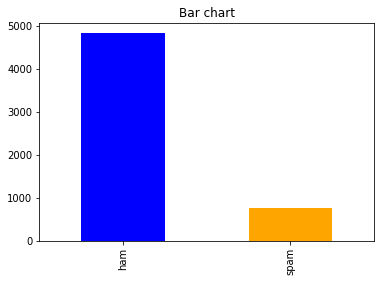

In [ ]:
count_Class=pd.value_counts(df["v1"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

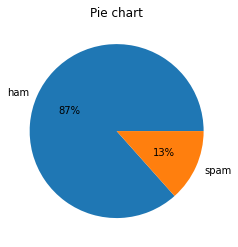

In [ ]:
count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()

## Analisa Teks

In [ ]:
count1 = Counter(" ".join(df[df['v1']=='ham']["v2"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})
count2 = Counter(" ".join(df[df['v1']=='spam']["v2"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})

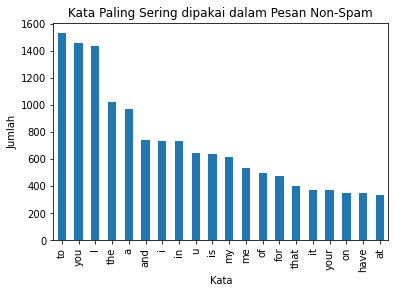

In [ ]:
df1.plot.bar(legend = False)
y_pos = np.arange(len(df1["words in non-spam"]))
plt.xticks(y_pos, df1["words in non-spam"])
plt.title('Kata Paling Sering dipakai dalam Pesan Non-Spam')
plt.xlabel('Kata')
plt.ylabel('Jumlah')
plt.show()

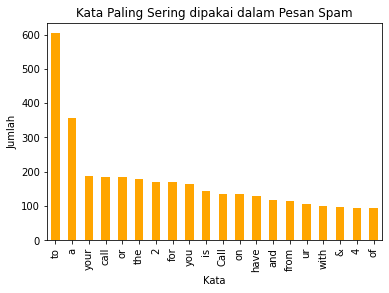

In [ ]:
df2.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
plt.title('Kata Paling Sering dipakai dalam Pesan Spam')
plt.xlabel('Kata')
plt.ylabel('Jumlah')
plt.show()

## Teks Processing

In [ ]:
#Menghapus Stop Word dan meningkatkan analisis

f = feature_extraction.text.CountVectorizer(stop_words = 'english')
X = f.fit_transform(df["v2"])
np.shape(X)

(5572, 8442)

## Analisis Prediksi SVM dengan rbf

In [ ]:
df["v1"]=df["v1"].map({'spam':1,'ham':0})
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, df['v1'], test_size=0.25, random_state=50)
print([np.shape(X_train), np.shape(X_test)])

[(4179, 8442), (1393, 8442)]


In [ ]:
list_C = np.arange(500, 2000, 100) #100000
score_train = np.zeros(len(list_C))
score_test = np.zeros(len(list_C))
recall_test = np.zeros(len(list_C))
precision_test= np.zeros(len(list_C))
count = 0
for C in list_C:
    svc = svm.SVC(C=C)
    svc.fit(X_train, y_train)
    score_train[count] = svc.score(X_train, y_train)
    score_test[count]= svc.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, svc.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, svc.predict(X_test))
    count = count + 1 

## Evaluasi cek akurasi dan presisi

In [ ]:
matrix = np.matrix(np.c_[list_C, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['C', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=10)

,C,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,500.0,1.0,0.973439,0.83,0.982249
1,600.0,1.0,0.973439,0.83,0.982249
2,700.0,1.0,0.973439,0.83,0.982249
3,800.0,1.0,0.973439,0.83,0.982249
4,900.0,1.0,0.973439,0.83,0.982249
5,1000.0,1.0,0.973439,0.83,0.982249
6,1100.0,1.0,0.973439,0.83,0.982249
7,1200.0,1.0,0.973439,0.83,0.982249
8,1300.0,1.0,0.973439,0.83,0.982249
9,1400.0,1.0,0.973439,0.83,0.982249


In [ ]:
best_index = models['Test Precision'].idxmax()
models.iloc[best_index, :]

C                 500.000000
Train Accuracy      1.000000
Test Accuracy       0.973439
Test Recall         0.830000
Test Precision      0.982249
Name: 0, dtype: float64

In [ ]:
models[models['Test Precision']>=0.9].head(n=5)

,C,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,500.0,1.0,0.973439,0.83,0.982249
1,600.0,1.0,0.973439,0.83,0.982249
2,700.0,1.0,0.973439,0.83,0.982249
3,800.0,1.0,0.973439,0.83,0.982249
4,900.0,1.0,0.973439,0.83,0.982249


In [ ]:
best_index = models[models['Test Precision']>=0.9]['Test Accuracy'].idxmax()
svc = svm.SVC(C=list_C[best_index])
svc.fit(X_train, y_train)
models.iloc[best_index, :]

C                 500.000000
Train Accuracy      1.000000
Test Accuracy       0.973439
Test Recall         0.830000
Test Precision      0.982249
Name: 0, dtype: float64

## Evaluasi dengan Confusion Matrix

In [ ]:
m_confusion_test = metrics.confusion_matrix(y_test, svc.predict(X_test))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,1190,3
Actual 1,34,166


In [ ]:
tn, fp, fn, tp = cm.ravel()

print(f'TN: {tn}')
print(f'FP: {fp}')
print(f'FN: {fn}')
print(f'TP: {tp}')

TN: 1190
FP: 3
FN: 34
TP: 166


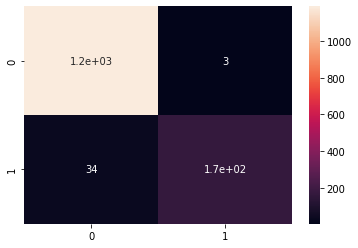

In [ ]:
m_confusion_test = confusion_matrix(y_test, svc.predict(X_test))

sns.heatmap(m_confusion_test, annot=True)
plt.savefig('confusion.png')